In [324]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the car prices dataset into a pandas dataframe
df=pd.read_csv("/Users/rahul/Downloads/CarPrices (3)/CarPrice_Assignment.csv")
tester=pd.read_csv("/Users/rahul/Downloads/CarPrices (3)/CarPrice_Assignment.csv")

# Select the features and target variable
x=df[['symboling','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','wheelbase','carlength','carwidth','carheight','curbweight','enginetype','cylindernumber','enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']]
y=df[['price']]

# Calculate the correlation between the features and target variable
df.corr()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


In [325]:
# Extract the relevant features for regression analysis
wheelbase=df.wheelbase
carlength=df.carlength
carwidth=df.carwidth
carheight=df.carheight
curbweight=df.curbweight
enginesize=df.enginesize
boreratio=df.boreratio
stroke=df.stroke
compressionratio=df.compressionratio
horsepower=df.horsepower
price=df.price

# Define a class for Linear Regression
class LinearRegression:
    
    # Initialize the learning rate and number of iterations
    def __init__(self,lr=0.0005,n_iters=100000):
        self.lr=lr
        self.n_iters=n_iters
        self.weights=None
        self.bias=None
    
    # Define the fit method to fit the model to the training data
    def fit(self,x,y):
        n_samples,n_features=x.shape
        self.weights=np.zeros(n_features)
        self.bias=0 
        
        # Update the weights and bias for n_iters iterations
        for r in range(self.n_iters):
            y_pred = np.dot(x,self.weights) + self.bias   
            dw = (1/n_samples) * np.dot(x.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred-y)
        
            self.weights=self.weights-self.lr*dw
            self.bias=self.bias-self.lr*db
         
    # Define the predict method to make predictions on the test data   
    def predict(self,x):
        y_pred = np.dot(x,self.weights) + self.bias
        return y_pred




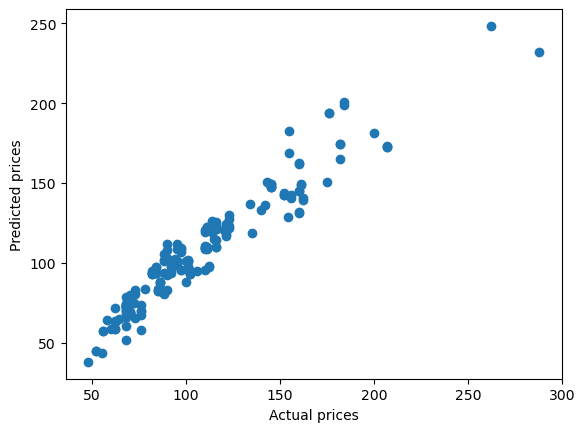

In [326]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.show()

In [327]:
# Extract the relevant features from the test data
car_ID = tester.car_ID
symboling = tester.symboling
CarName = tester.CarName
fueltype = tester.fueltype
aspiration = tester.aspiration
doornumber = tester.doornumber
carbody = tester.carbody
drivewheel = tester.drivewheel
enginelocation = tester.enginelocation
enginetype = tester.enginetype
cylindernumber = tester.cylindernumber
fuelsystem = tester.fuelsystem
peakrpm = tester.peakrpm
citympg = tester.citympg
highwaympg = tester.highwaympg
price = tester.price

In [328]:
# Drop irrelevant features from the test data
tester = tester.drop(["car_ID"], axis=1)
tester = tester.drop(["symboling"], axis=1)
tester = tester.drop(["CarName"], axis=1)
tester = tester.drop(["fueltype"], axis=1)
tester = tester.drop(["aspiration"], axis=1)
tester = tester.drop(["doornumber"], axis=1)
tester = tester.drop(["carbody"], axis=1)
tester = tester.drop(["drivewheel"], axis=1)
tester = tester.drop(["enginelocation"], axis=1)
tester = tester.drop(["enginetype"], axis=1)
tester = tester.drop(["cylindernumber"], axis=1)
tester = tester.drop(["fuelsystem"], axis=1)
tester = tester.drop(["peakrpm"], axis=1)
tester = tester.drop(["citympg"], axis=1)
tester = tester.drop(["highwaympg"], axis=1)
tester = tester.drop(["price"], axis=1)
tester.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115


In [329]:
# Split the dataset into training and testing sets
x_train, y_train = tester.iloc[:,:10].values, tester.iloc[:,-1].values
x_train.shape, y_train.shape

((205, 10), (205,))

In [330]:
# Print the shapes of the training and testing data
print("x train is", x_train)
print("Y train is", y_train)
print("X test is", x_test)
print("Y test is", y_test)

x train is [[ 88.6  168.8   64.1  ...   2.68   9.   111.  ]
 [ 88.6  168.8   64.1  ...   2.68   9.   111.  ]
 [ 94.5  171.2   65.5  ...   3.47   9.   154.  ]
 ...
 [109.1  188.8   68.9  ...   2.87   8.8  134.  ]
 [109.1  188.8   68.9  ...   3.4   23.   106.  ]
 [109.1  188.8   68.9  ...   3.15   9.5  114.  ]]
Y train is [111 111 154 102 115 110 110 110 140 160 101 101 121 121 121 182 182 182
  48  70  70  68  68 102  68  68  68 102  88 145  58  76  60  76  76  76
  76  86  86  86  86 101 100  78  70  70  90 176 176 262  68  68  68  68
  68 101 101 101 135  84  84  84  84  64  84 120  72 123 123 123 123 155
 155 184 184 175  68  68  68 102 116  88 145 145 145  88  88 116 116  69
  55  69  69  69  69  69  69  69  69  97  97 152 152 152 160 200 160  97
  95  97  95  95  95  95  95  97  95 142  68 102  68  68  68  88 145 143
 207 207 207 288  90  90 110 110 110 110 160 160  69  73  73  82  82  94
  82 111  82  94  82 111  62  62  62  62  62  62  70  70  56  56  70  70
  70  70  70 112 112 

In [331]:
# Scale the training and testing data using min-max scaling
x_train = (x_train - x_train.mean(axis = 0)) / ( x_train.max(axis = 0) - x_train.min(axis = 0) )
x_test = (x_test - x_test.mean(axis = 0)) / ( x_test.max(axis = 0) - x_test.min(axis = 0) )
print("X train is ", x_train)
print("Y train is ", x_test)

X train is  [[-0.29611036 -0.07834729 -0.15065041 ... -0.27400697 -0.07140854
   0.02867886]
 [-0.29611036 -0.07834729 -0.15065041 ... -0.27400697 -0.07140854
   0.02867886]
 [-0.1240987  -0.04252639 -0.03398374 ...  0.10218351 -0.07140854
   0.20784553]
 ...
 [ 0.30155728  0.22016017  0.24934959 ... -0.18353078 -0.08390854
   0.1245122 ]
 [ 0.30155728  0.22016017  0.24934959 ...  0.06885017  0.80359146
   0.00784553]
 [ 0.30155728  0.22016017  0.24934959 ... -0.05019744 -0.04015854
   0.04117886]]
Y train is  [[-0.29611036 -0.07834729 -0.15065041 ... -0.27400697 -0.07140854
   0.02867886]
 [-0.29611036 -0.07834729 -0.15065041 ... -0.27400697 -0.07140854
   0.02867886]
 [-0.1240987  -0.04252639 -0.03398374 ...  0.10218351 -0.07140854
   0.20784553]
 ...
 [ 0.30155728  0.22016017  0.24934959 ... -0.18353078 -0.08390854
   0.1245122 ]
 [ 0.30155728  0.22016017  0.24934959 ...  0.06885017  0.80359146
   0.00784553]
 [ 0.30155728  0.22016017  0.24934959 ... -0.05019744 -0.04015854
   0.041

In [332]:
# Create a linear regression model and fit it on the training data
reg = LinearRegression()
reg.fit(x_train,y_train)

# Use the trained model to make predictions on the testing data
predictions = reg.predict (x_test)

# Define a function to calculate mean squared error
def mse (y_test, predictions) :
    return np.mean ((y_test-predictions)**2)

# Define a function to calculate root mean squared error
def rmse(y_test, predictions):
    return np.sqrt(mse(y_test, predictions))

# Calculate the MSE and RMSE of the predictions
MSE = mse(y_test, predictions)
RMSE = rmse(y_test, predictions)

#Print the results
print("MSE: ", MSE)
print("RMSE: ", RMSE)
    


MSE:  121.46006350980583
RMSE:  11.020892137654094
